In [20]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras #type: ignore
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random

In [25]:
DATA_PATH = 'D:\kikis_projects\cough sound detection\JSON\dataset_trim4.json'

In [26]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = pad_sequences(data["mfcc"], padding='post') #making the list in array the same size
    y = np.array(data["labels"])
    print(X.shape)
    return X, y
load_data(DATA_PATH)

(536, 120, 13)


(array([[[-652,   94,  -40, ...,    0,    5,  -17],
         [-664,   97,  -12, ...,    7,    9,  -21],
         [-674,   83,  -23, ...,    4,    9,  -19],
         ...,
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0]],
 
        [[-764,   10,    9, ...,   -6,   -6,   -6],
         [-764,   10,    9, ...,   -2,   -3,   -3],
         [-766,    7,    7, ...,   -5,   -6,   -6],
         ...,
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0]],
 
        [[-718,   16,   16, ...,    5,    3,    2],
         [-722,   10,   10, ...,    0,   -1,   -3],
         [-723,    9,    9, ...,    2,    1,    0],
         ...,
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0]],
 
        ...,


In [28]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()



In [29]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis] # -> (num_samples, 130, 13, 1)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test






(536, 120, 13)
(321, 120, 13, 1)


c:\Users\kikin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 11, 512)   │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 6, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 59, 6, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 4, 256)     │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 2, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 2, 256)     │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 29, 2, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 1, 128)     │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 1, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,434,690 (5.47 MB)

 Trainable params: 1,432,898 (5.47 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.5716 - loss: 0.8111 - val_accuracy: 0.4938 - val_loss: 0.9224
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.6545 - loss: 0.6387 - val_accuracy: 0.5679 - val_loss: 0.8097
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.6830 - loss: 0.5823 - val_accuracy: 0.5926 - val_loss: 0.7496
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.6947 - loss: 0.5971 - val_accuracy: 0.6420 - val_loss: 0.7034
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.6708 - loss: 0.6211 - val_accuracy: 0.6667 - val_loss: 0.6397
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step - accuracy: 0.7398 - loss: 0.5230 - val_accuracy: 0.6420 - val_loss: 0.6538
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step - accuracy: 0.6878 - loss: 0.5842 - val_accuracy: 0.6420 - val_loss: 0.6479
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.7148 - loss: 0.5400 - val_accuracy: 0.

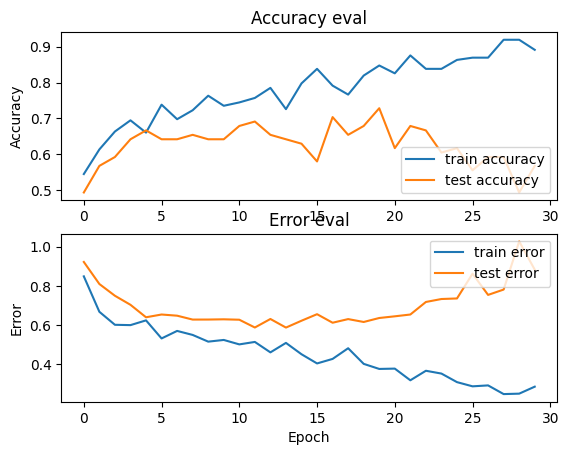

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5834 - loss: 0.8234 

Test accuracy: 0.60447758436203
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Target: 1, Predicted label: [1]


In [30]:
def build_model(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.15))

    # 3rd conv layer
    model.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.15))

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.15))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model

def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    print(X_train.shape)
    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.AdamW(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[random.randint(0, len(X_test) - 1)]
    y_to_predict = y_test[random.randint(0, len(X_test) - 1)]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

In [31]:
model.save('MODEL_CNN.h5') # To save the model